In [1]:
from astropy.io import fits
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import twirl

%config IPCompleter.use_jedi = False

In [56]:
# opening the image and retrieving center and field of view
hdu = fits.open("...")[0]

header = hdu.header 
data = hdu.data

# ra, dec in degrees
ra, dec = header["RA"], header["DEC"]
center = SkyCoord(ra, dec, unit=["hour", "deg"])
center = [center.ra.value, center.dec.value]

# image shape and pixel size in "
shape = data.shape
pixel = 0.66 * u.arcsec
fov = np.max(shape)*pixel.to(u.deg).value

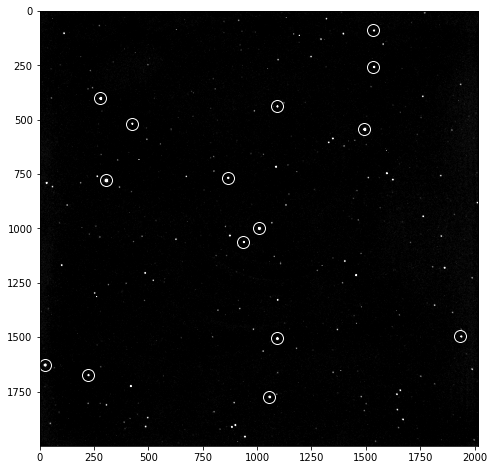

In [57]:
# Let's find some stars and display the image

stars = twirl.find_peaks(data)[0:15]

plt.figure(figsize=(8,8))
med = np.median(data)
plt.imshow(data, cmap="Greys_r", vmax=np.std(data)*5 + med, vmin=med)
plt.plot(*stars.T, "o", fillstyle="none", c="w", ms=12)

In [60]:
# we can now compute the WCS
gaias = twirl.gaia_radecs(center, fov/2, limit=20)
wcs = twirl._compute_wcs(stars, gaias)

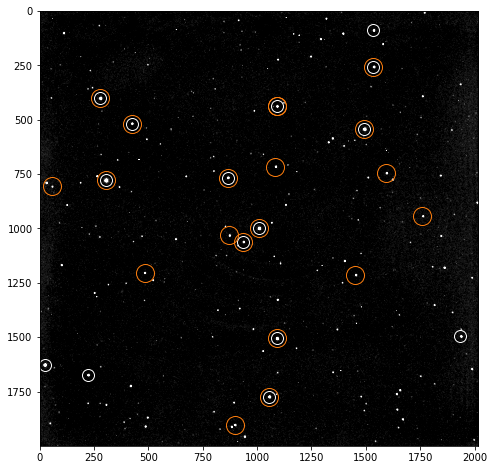

In [69]:
# Lets check the WCS solution 

plt.figure(figsize=(8,8))
gaias_pixel = np.array(SkyCoord(gaias, unit="deg").to_pixel(wcs)).T
plt.imshow(data, cmap="Greys_r", vmax=np.std(data)*2 + med, vmin=med)
plt.plot(*stars.T, "o", fillstyle="none", c="w", ms=12)
plt.plot(*gaias_pixel.T, "o", fillstyle="none", c="C1", ms=18)